## Introduction to Topic Modeling

My final modeling task is to see whether topic modeling extracts any of the key words from our entire corpus of plays - both Shakespeare and non-Shakespeare. It is possible that this is too small of a corpus to extract meaningful insights as often topic modeling is working with huge volumes of text data, ex from Yelp reviews or newspapers. I am using Gensim's Latent Dirichlet Allocation library so that I can also calculate a coherence metric.

In [1]:
# importing libraries for plotting, importing files, modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim

import random
np.random.seed(0)

import warnings 
warnings.filterwarnings('ignore')

C:\Users\NPren\anaconda3\envs\learn-env\lib\site-packages\_pytest\mark\structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


In [2]:
# importing data from pickle files
with open('data/pickle_jar.pickle', 'rb') as f:
    pickle_jar = pickle.load(f)  

train_tokens = pickle_jar[10]
test_tokens = pickle_jar[11]

# Generating Gensim Topic Model

I am first using gensim to generate the term frequency of the whole corpus togetherm turning each play into a bag of words and creating a (word, frequency) format of each word in our text.

In [3]:
# creating complete list of tokens
tokens = train_tokens + test_tokens

# creating dictionary
id2word = corpora.Dictionary(tokens)

# generating term frequency for each play
corpus = [id2word.doc2bow(text) for text in tokens]

# viewing the first 100 words from the first play
print(corpus[:1][:100])

[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 8), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 2), (14, 1), (15, 3), (16, 1), (17, 1), (18, 3), (19, 4), (20, 1), (21, 1), (22, 1), (23, 1), (24, 9), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 4), (57, 1), (58, 2), (59, 11), (60, 1), (61, 5), (62, 20), (63, 2), (64, 1), (65, 1), (66, 1), (67, 7), (68, 1), (69, 9), (70, 9), (71, 1), (72, 3), (73, 13), (74, 2), (75, 1), (76, 1), (77, 2), (78, 1), (79, 3), (80, 6), (81, 1), (82, 2), (83, 2), (84, 1), (85, 1), (86, 2), (87, 5), (88, 4), (89, 3), (90, 1), (91, 2), (92, 3), (93, 1), (94, 1), (95, 5), (96, 1), (97, 2), (98, 3), (99, 6), (100, 5), (101, 1), (102, 3), (103, 1), (104, 1), (105, 4), (106, 1), (107, 8), (108, 1), (109, 7), (110,

In [4]:
# viewing the same data as above pulling the wordid from id2word
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1][:100]]

[[('abase', 1),
  ('abbey', 1),
  ('abides', 1),
  ('abject', 3),
  ('able', 8),
  ('aboard', 1),
  ('abominable', 1),
  ('abortive', 1),
  ('abound', 1),
  ('abroad', 1),
  ('abrook', 1),
  ('absyrtus', 1),
  ('abuse', 3),
  ('accept', 2),
  ('accompt', 1),
  ('accord', 3),
  ('accordeth', 1),
  ('accusation', 1),
  ('accusd', 3),
  ('accuse', 4),
  ('accuser', 1),
  ('achieve', 1),
  ('achilles', 1),
  ('acquit', 1),
  ('act', 9),
  ('action', 2),
  ('active', 1),
  ('adam', 1),
  ('add', 1),
  ('adder', 1),
  ('address', 1),
  ('adjudgd', 1),
  ('admird', 1),
  ('admit', 1),
  ('adsum', 1),
  ('advance', 1),
  ('advantage', 2),
  ('adventure', 1),
  ('advertise', 1),
  ('advice', 2),
  ('advisd', 1),
  ('advise', 1),
  ('advised', 1),
  ('aeacida', 1),
  ('aeneas', 2),
  ('aeolus', 1),
  ('afar', 1),
  ('afeard', 1),
  ('affable', 1),
  ('affair', 3),
  ('affect', 1),
  ('affected', 1),
  ('affiance', 1),
  ('afflict', 1),
  ('affliction', 1),
  ('affords', 1),
  ('affright', 4),
  

In [5]:
# building LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"king" + 0.012*"lord" + 0.009*"shall" + 0.007*"come" + 0.007*"good" + '
  '0.006*"make" + 0.006*"enter" + 0.005*"well" + 0.005*"let" + 0.005*"go"'),
 (1,
  '0.008*"shall" + 0.007*"love" + 0.006*"come" + 0.006*"king" + 0.006*"make" + '
  '0.005*"lord" + 0.005*"let" + 0.005*"enter" + 0.004*"see" + '
  '0.004*"tamburlaine"'),
 (2,
  '0.007*"shall" + 0.007*"come" + 0.006*"make" + 0.006*"sir" + 0.005*"would" + '
  '0.005*"let" + 0.005*"lord" + 0.005*"good" + 0.005*"like" + 0.005*"enter"'),
 (3,
  '0.015*"sir" + 0.006*"make" + 0.005*"come" + 0.005*"good" + 0.005*"shall" + '
  '0.005*"one" + 0.004*"know" + 0.004*"face" + 0.004*"well" + 0.004*"would"'),
 (4,
  '0.007*"shall" + 0.006*"come" + 0.006*"good" + 0.006*"make" + 0.006*"love" + '
  '0.006*"sir" + 0.005*"lord" + 0.005*"well" + 0.005*"enter" + 0.004*"let"'),
 (5,
  '0.008*"sir" + 0.007*"shall" + 0.007*"good" + 0.007*"come" + 0.006*"know" + '
  '0.006*"make" + 0.006*"would" + 0.006*"man" + 0.005*"well" + 0.005*"love"'),
 (6,

We can see based on the above outcome of generating 7 topics from our text that the most common words may largely be overlapping due to the nature of our texts, which may generally be too similar to differentiate topics. It is also possible that the model will pull in many character names as topics.

# Visualizing Topics

I am using the pyLDAvis library for an interactive way to interpret the topic model, showing the most relevant terms for each topic when selected and the term frequency for each of those words within the topic.

In [6]:
# Visualizing the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.051523 -0.016728       1        1  20.989857
4      0.022366 -0.015765       2        1  17.062204
5     -0.026272 -0.025205       3        1  15.444878
3     -0.093249 -0.047378       4        1  15.431283
6     -0.029222  0.067913       5        1  14.801712
2      0.001555  0.064189       6        1   9.905628
1      0.073299 -0.027025       7        1   6.364437, topic_info=      Category          Freq    Term         Total  loglift  logprob
1621   Default   6429.000000    king   6429.000000  30.0000  30.0000
1757   Default   7476.000000    lord   7476.000000  29.0000  29.0000
15273  Default   1162.000000     ile   1162.000000  28.0000  28.0000
2652   Default  10087.000000     sir  10087.000000  27.0000  27.0000
23310  Default    827.000000  jonson    827.000000  26.0000  26.0000
...        ...           ...     ...           ...      ...      ...
2905    Topic7    260.873932    take   4716.541504  -0.1403  -5.7821
3130    Topic7    248.443985    upon   4151.623047  -0.0616  -5.8309
1401    Topic7    225.801346   heart   2542.088867   0.3334  -5.9265
3355    Topic7    229.927155     yet   4411.750977  -0.1998  -5.9084
1946    Topic7    227.057053    must   4660.150879  -0.2672  -5.9210

[597 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
17363      5  0.021441      aaron
17363      7  0.964845      aaron
33984      2  0.112067    abigail
33984      6  0.874123    abigail
22         1  0.022777   achilles
...      ...       ...        ...
3358       6  0.001913       york
3358       7  0.001913       york
21167      1  0.048097  zenocrate
21167      7  0.942703  zenocrate
47768      2  0.977414        zuc

[1440 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 4, 7, 3, 2])

This visualization shows not too significance an overlap between each of the topics. We can also adjust the relevance, a method for ranking terms within topics that can be tuned with λ representing the weight given to the probability of each term given topic. The higher the λ, the more the results will be ranked in order of each term's probability to the topic. A lower λ ranks terms solely by their lift(the ratio of a term's probabiltiy within a topic to its probability across the corpus, decreasing the rankings of globally frequent terms, resulting often in rare terms). That results for us in seeing which character name tokens define our topic at λ = 0, and tokens being ranked in terms of topic-specific probability at λ=1.

# Measuring Coherence
As a last exploration of topic modeling with our corpus, I want to see if there is an improvement in the coherence scores for increases in k topics being modeled. This is useful for understanding the quality of these topics and the semantic similarity of high scoring words in the topic - essentially helping us measure how human-interpretable our topics are. I am using C_v, a high-performing coherence measure. 

In [7]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2983558549915589


In [8]:
# Checking for improvement to coherence scores
topics = []
coherence_scores = []

for i in range(3, 30):
    topics.append(i)
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

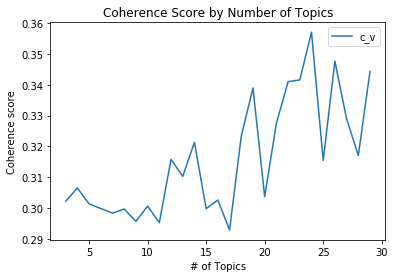

In [9]:
# plotting coherence scores based on increases in k topics
plt.plot(topics, coherence_scores, label='c_v')
plt.xlabel('# of Topics')
plt.ylabel('Coherence score')
plt.legend(loc='best')
plt.title('Coherence Score by Number of Topics')
plt.show()

Our coherence scores continue to seem generally low with little change in improvement over an increase in topics, essentially indicating to us that the vectors for our top terms for each topic are not very similar. This is not very surprising due to the size of our corpus.

# Conclusion

Our topic modeling does not result in significantly coherent topic, and intuition can confirm this. Additionally, there likelynot a high degree of diversity of topics within our plays, and the most distinct topics produced are between the comedy/romance and historical/drama categories. However, the pyLDAvis and other Gensim tools are useful, interesting tools for exploring text data.